## BERT approach results

In [1]:
import sys
sys.path.append("../../../Scripts/")

In [2]:
import pickle as pkl
from sklearn import metrics
import plots

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
path = '../Data/BERT-results/'

In [4]:
target_names_mc = ['sneg', 'spos', 'fneg', 
                'fpos', 'wneg', 'wpos']

## Functions

In [5]:
# Read a pickle file and return the data
def read_pickle(path, file):
    with open(f'{path}{file}', 'rb') as f:
        return pkl.load(f)

In [6]:
# Results
def get_metrics(y_test, y_pred, target_names):
    clf_report = metrics.classification_report(y_test, y_pred, target_names=target_names)
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    accuracy = metrics.accuracy_score(y_test, y_pred)

    return [clf_report, confusion_matrix, accuracy]

## AS-Multiclass

In [44]:
y_test_asmc = read_pickle(path, 'y_test_multiclass.pkl')
y_pred_asmc = read_pickle(path, 'y_pred_aspect_sentiment.pkl')

In [45]:
metrics_asmc = get_metrics(y_test_asmc, y_pred_asmc, target_names_mc)

In [46]:
print(metrics_asmc[0])

              precision    recall  f1-score   support

        sneg       0.94      0.89      0.92       149
        spos       0.90      0.87      0.88       149
        fneg       0.95      0.96      0.95       165
        fpos       0.90      0.96      0.93       143
        wneg       0.96      0.92      0.94       140
        wpos       0.94      0.97      0.96       154

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



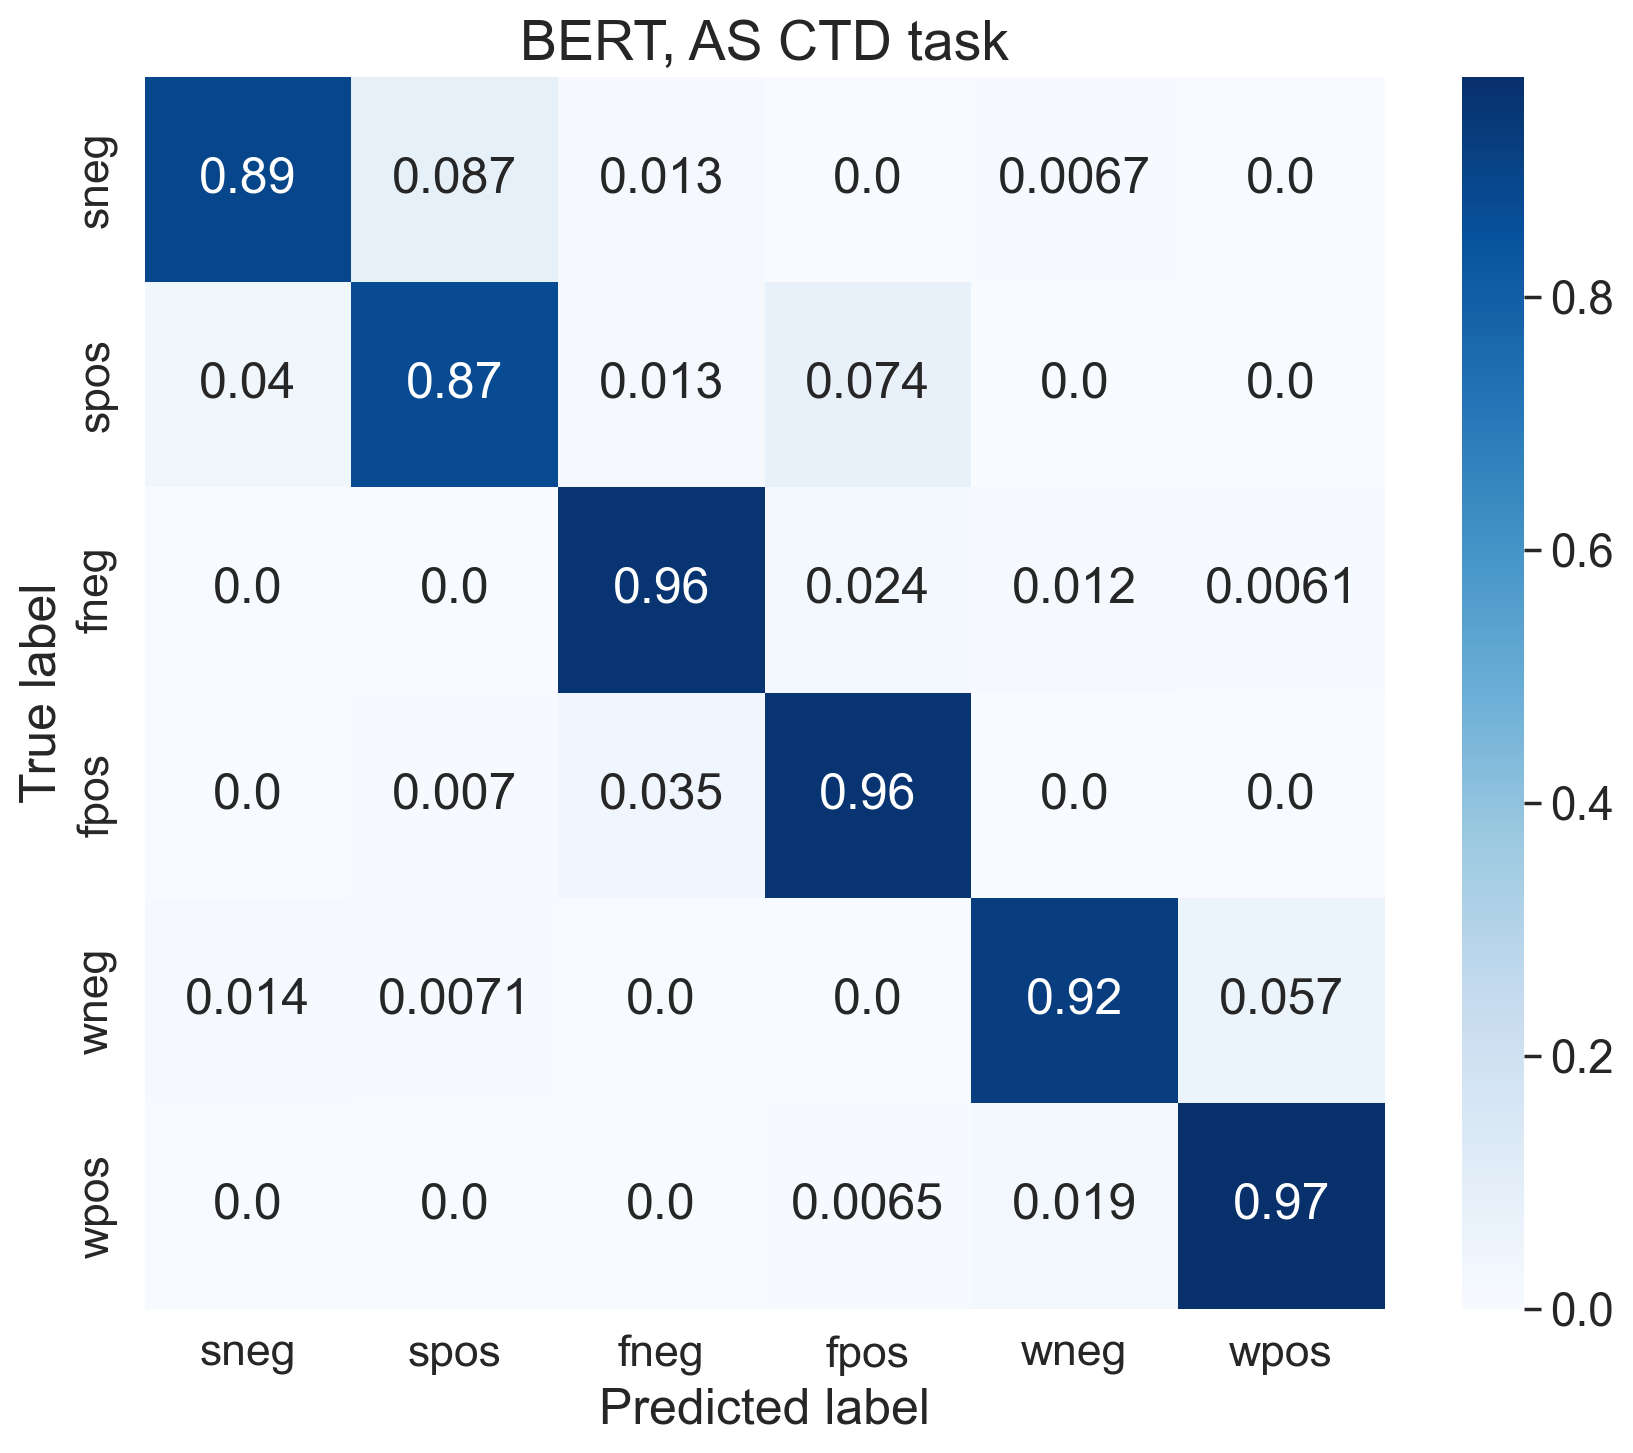

In [48]:
plot_bert_asmc = plots.Plots(metrics_asmc)
plot_bert_asmc.plot_confusion_matrix(title='BERT, AS CTD task', 
                            x_label='Predicted label', 
                            y_label='True label', 
                            labels=target_names_mc)

## Multiclass approach

In [40]:
y_test_mc = read_pickle(path, 'y_test_multiclass.pkl')
y_pred_mc = read_pickle(path, 'y_pred_multiclass.pkl')

In [41]:
metrics_mc = get_metrics(y_test_mc, y_pred_mc, target_names_mc)

In [43]:
print(metrics_mc[0])

              precision    recall  f1-score   support

        sneg       0.86      0.93      0.89       149
        spos       0.90      0.83      0.86       149
        fneg       0.91      0.94      0.92       165
        fpos       0.88      0.94      0.91       143
        wneg       0.94      0.84      0.89       140
        wpos       0.94      0.95      0.95       154

    accuracy                           0.91       900
   macro avg       0.91      0.90      0.90       900
weighted avg       0.91      0.91      0.91       900



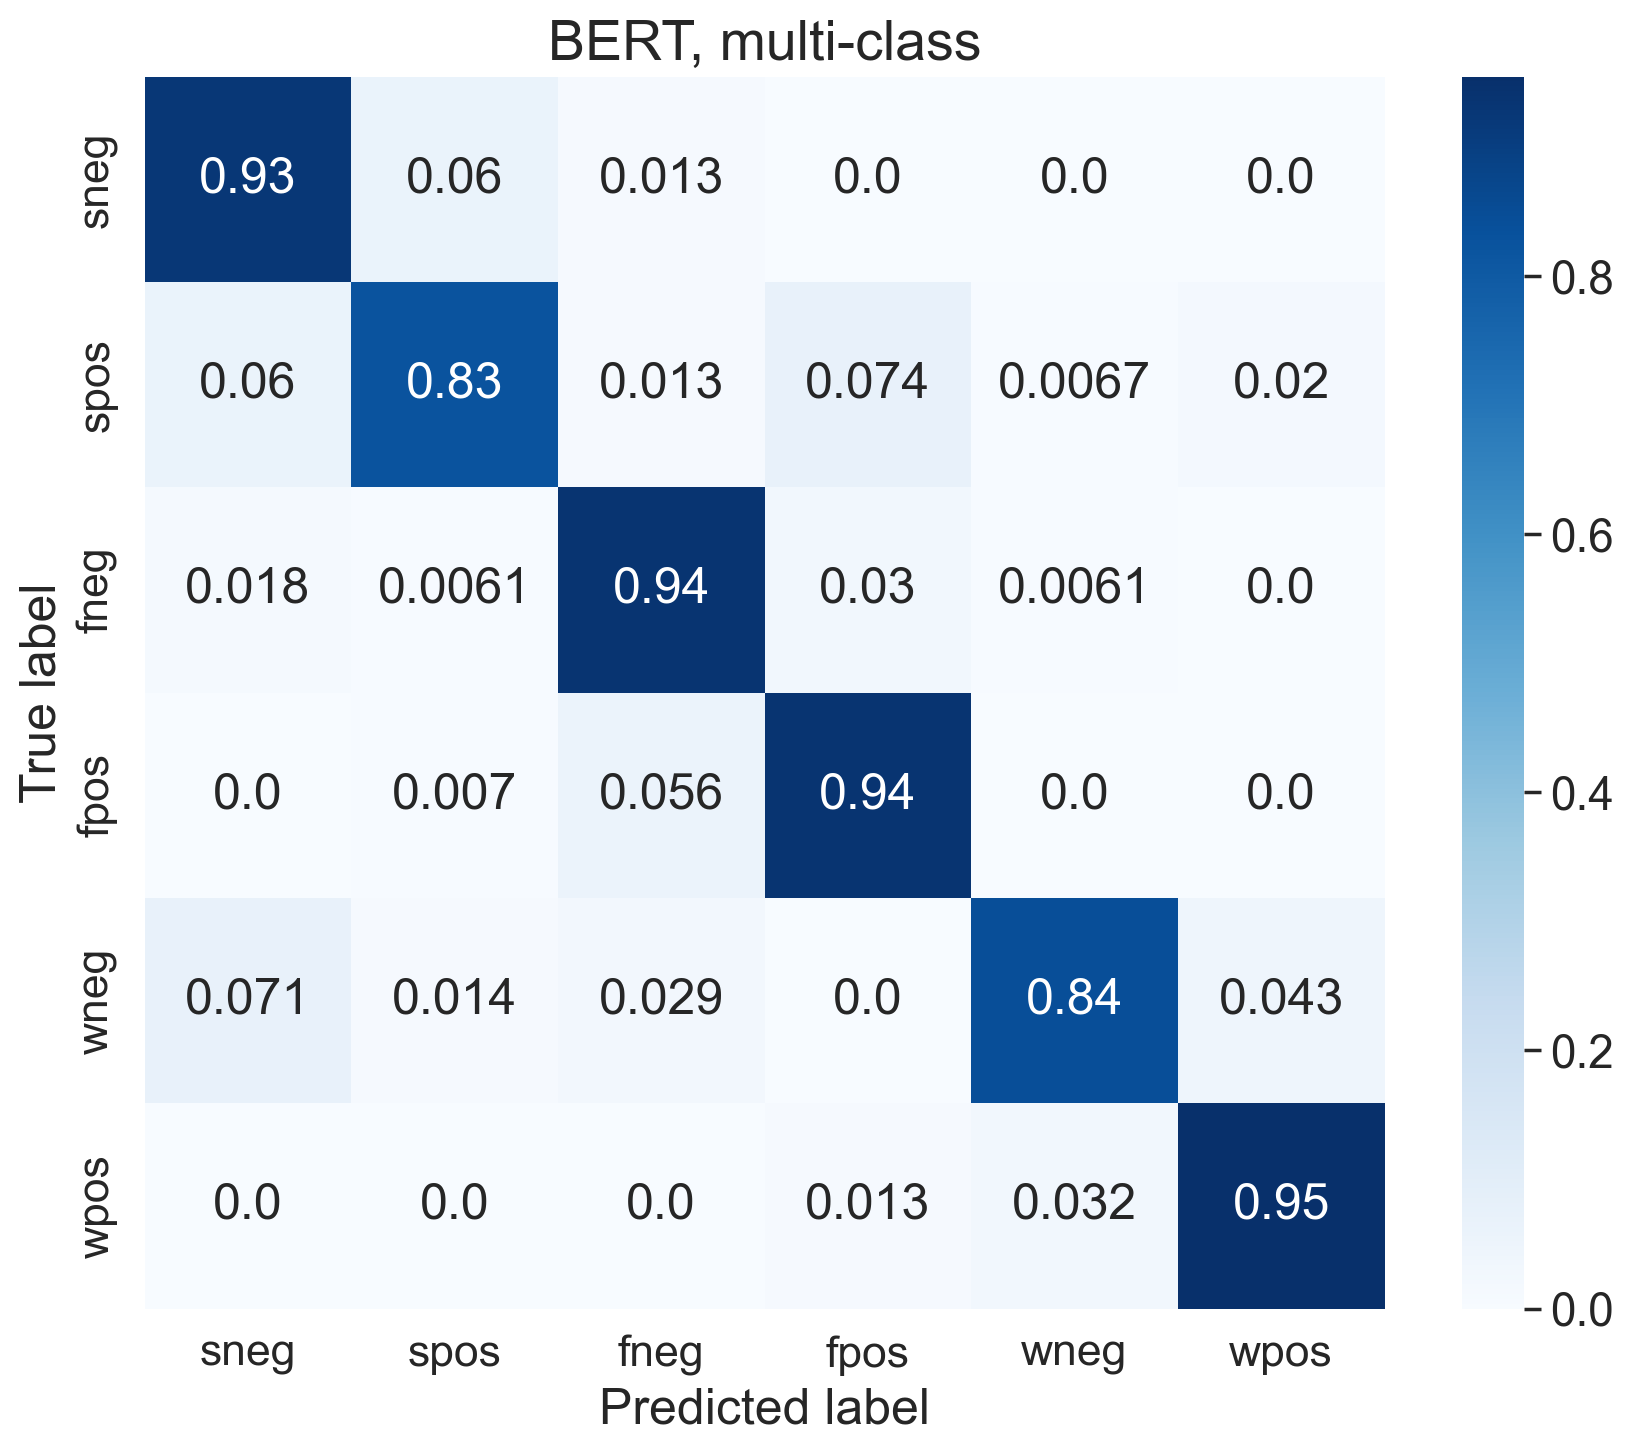

In [49]:
plot_bert_mc = plots.Plots(metrics_mc)
plot_bert_mc.plot_confusion_matrix(title='BERT, multi-class', 
                            x_label='Predicted label', 
                            y_label='True label', 
                            labels=target_names_mc)

## AS approach

### Aspect


In [30]:
y_test_as = read_pickle(path, 'y_test_aspect.pkl')
y_pred_as = read_pickle(path, 'y_pred_aspect.pkl')

In [31]:
targets_names_as = ['self', 'future', 'world']

In [32]:
metrics_as = get_metrics(y_test_as, y_pred_as, targets_names_as)

In [33]:
print(metrics_as[0])

              precision    recall  f1-score   support

        self       0.99      0.95      0.97       298
      future       0.95      0.99      0.97       308
       world       0.99      0.99      0.99       294

    accuracy                           0.97       900
   macro avg       0.97      0.97      0.97       900
weighted avg       0.97      0.97      0.97       900



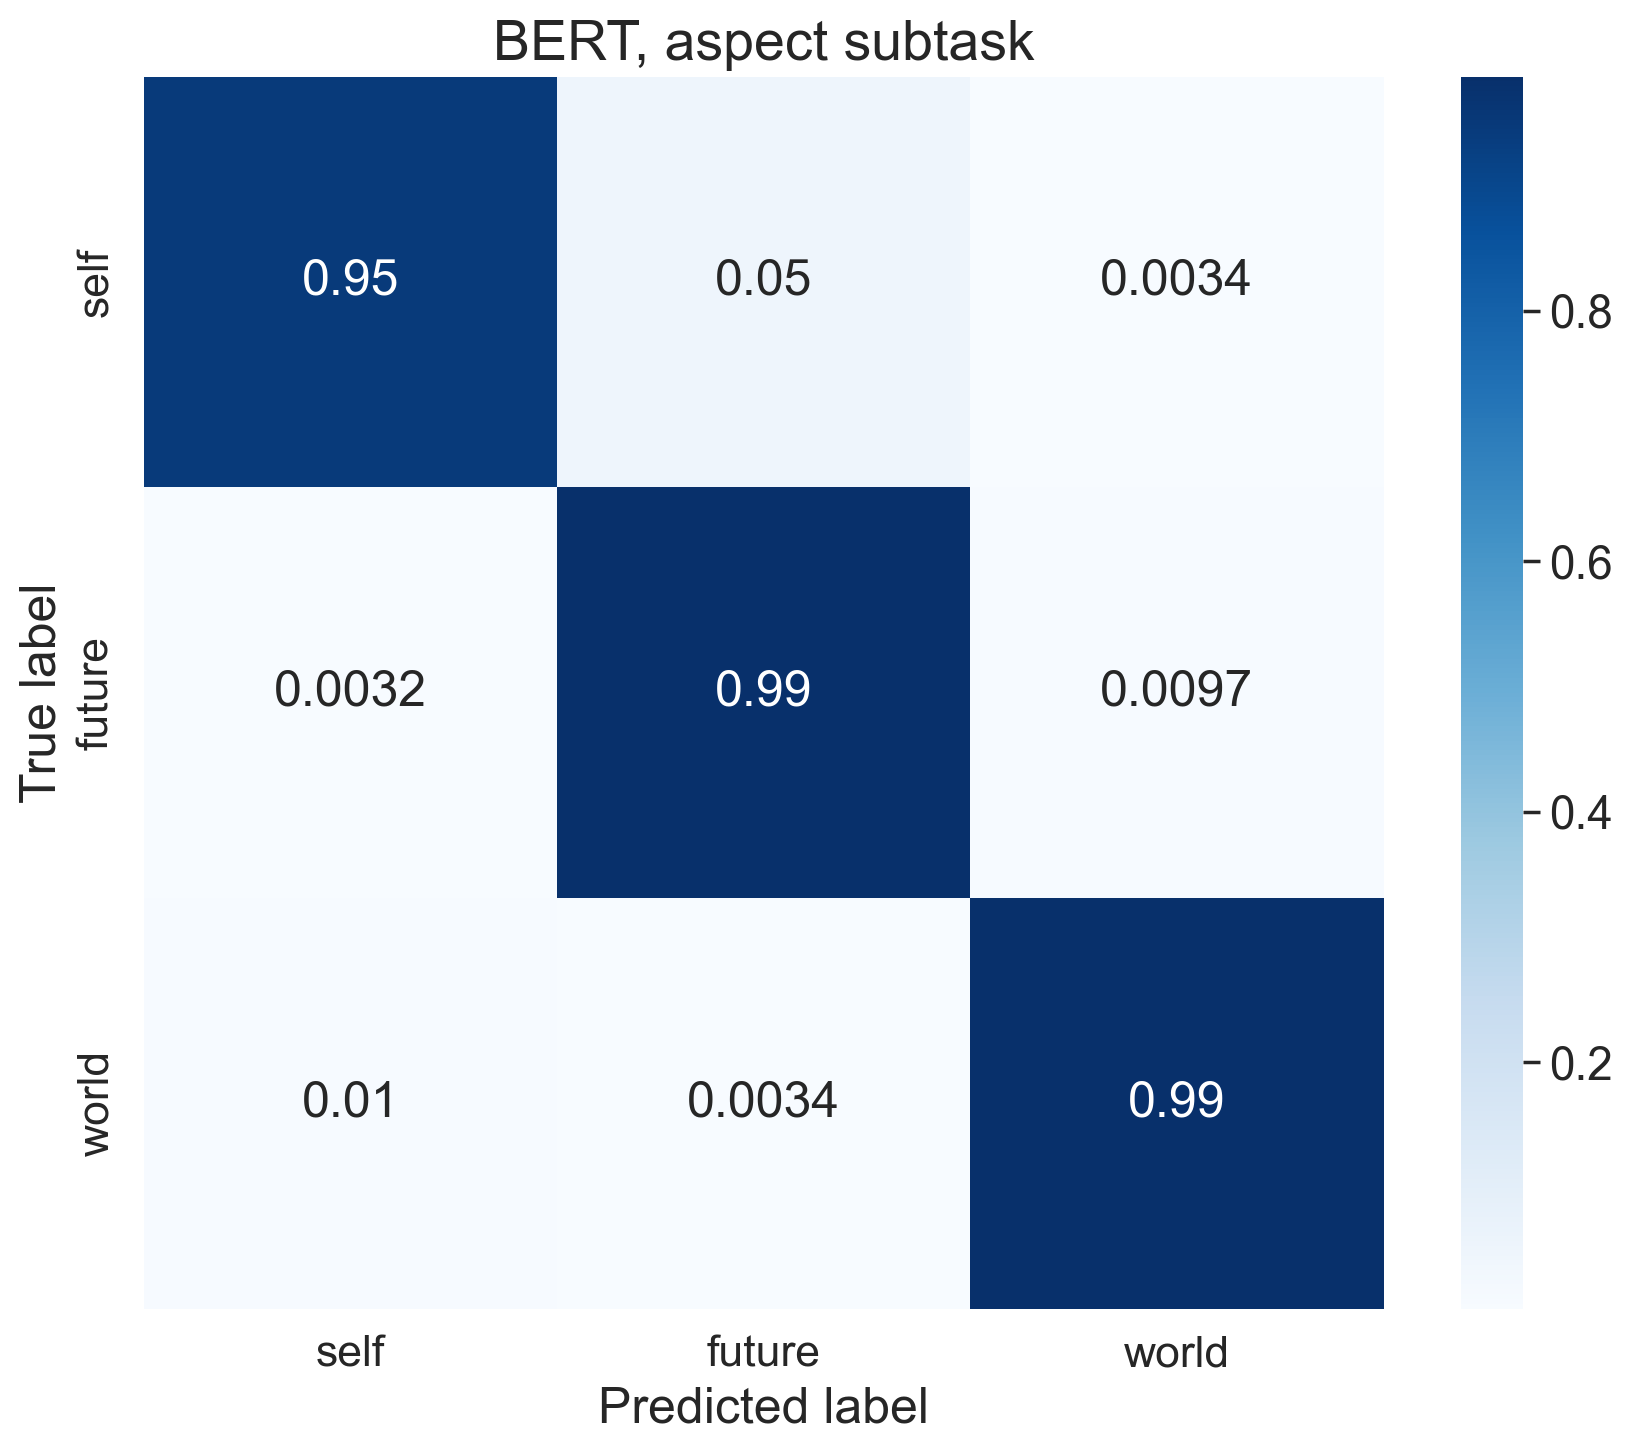

In [34]:
plot_bert_as = plots.Plots(metrics_as)
plot_bert_as.plot_confusion_matrix(title='BERT, aspect subtask', 
                            x_label='Predicted label', 
                            y_label='True label', 
                            labels=targets_names_as)

### Sentiment

In [35]:
y_test_s = read_pickle(path, 'y_test_sentiment.pkl')
y_pred_s = read_pickle(path, 'y_pred_sentiment.pkl')

In [36]:
target_names_s = ['Negative', 'Positive']

In [37]:
metrics_s = get_metrics(y_test_s, y_pred_s, target_names_s)


In [38]:
print(metrics_s[0])

              precision    recall  f1-score   support

    Negative       0.96      0.94      0.95       454
    Positive       0.94      0.96      0.95       446

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900



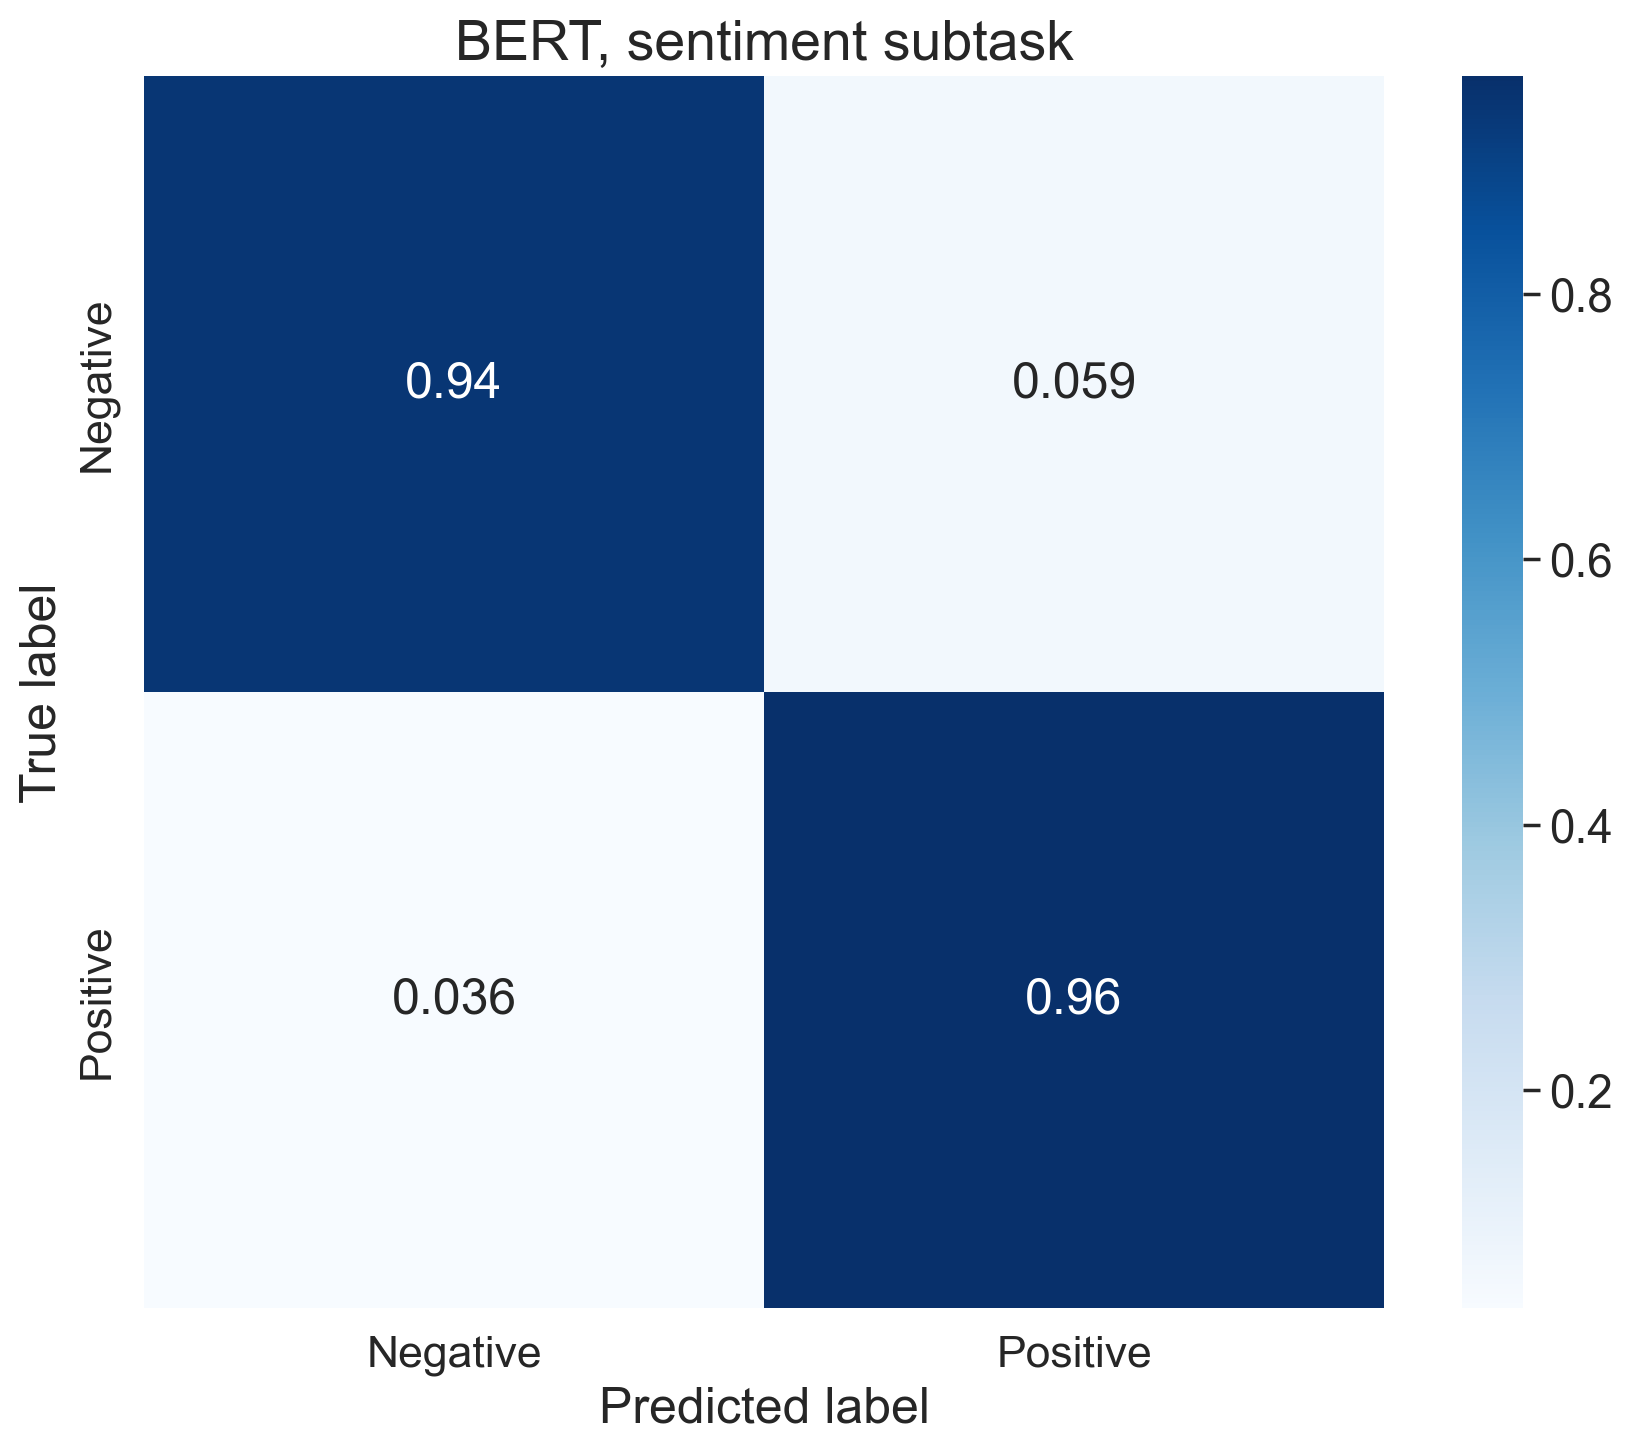

In [39]:
plot_bert_s = plots.Plots(metrics_s)
plot_bert_s.plot_confusion_matrix(title='BERT, sentiment subtask', 
                            x_label='Predicted label', 
                            y_label='True label', 
                            labels=target_names_s)